# <center>Fruit Classification using Neural Network</center>

In [129]:
import warnings
warnings.filterwarnings("ignore")
import keras
import numpy as np 
from keras.datasets.cifar10 import load_data
import glob
import os
import keras 
import cv2
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Trainning set

In [75]:
fruit_images = []
labels = []
for fruit_dir_path in glob.glob("F:/data/fruits-360/Training/*"):
    fruit_label = fruit_dir_path.split("/") #['F:', 'data', 'fruits-360', 'Training\\Apple Braeburn']
    fruit_label = fruit_label[3]
    for image_path in glob.glob(os.path.join(fruit_dir_path,"*.jpg")): #['F:/data/fruits-360/Training\\Apple Braeburn\\0_100.jpg', 'F:/data/fruits-360/Training\\Apple Braeburn\\100_100.jpg',
        image = cv2.imread(image_path,cv2.IMREAD_COLOR) # cv2.imread() to read an image
        image = cv2.resize(image,(45,45)) # Loads a color image
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) # conver RGB to BGR 
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images_ARR = np.array(fruit_images)
labels_ARR = np.array(labels)

In [112]:
fruit_images[0]

array([[[254, 255, 255],
        [254, 255, 255],
        [255, 255, 255],
        ...,
        [255, 253, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 255, 255],
        [254, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[252, 255, 251],
        [255, 253, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [111]:
len(fruit_images)

35625

In [109]:
len(labels)

35625

In [76]:
len(fruit_images[0]),len(fruit_images_ARR[0])

(45, 45)

In [77]:
fruit_images[0].all()==fruit_images_ARR[0].all() is True #just to check whether or not there is a different between list and array here =))

False

In [78]:
labels_ARR

array(['Training\\Apple Braeburn', 'Training\\Apple Braeburn',
       'Training\\Apple Braeburn', ..., 'Training\\Tangelo',
       'Training\\Tangelo', 'Training\\Tangelo'], dtype='<U28')

In [98]:
label_id_Dict = {key:value for value,key in enumerate(np.unique(labels_ARR))} #add index 0,1,2... to be keys of the values
id_label_Dict = {key:value for value,key in label_id_Dict.items()}

In [99]:
id_label_Dict

{0: 'Training\\Apple Braeburn',
 1: 'Training\\Apple Golden 1',
 2: 'Training\\Apple Golden 2',
 3: 'Training\\Apple Golden 3',
 4: 'Training\\Apple Granny Smith',
 5: 'Training\\Apple Red 1',
 6: 'Training\\Apple Red 2',
 7: 'Training\\Apple Red 3',
 8: 'Training\\Apple Red Delicious',
 9: 'Training\\Apple Red Yellow',
 10: 'Training\\Apricot',
 11: 'Training\\Avocado',
 12: 'Training\\Avocado ripe',
 13: 'Training\\Banana',
 14: 'Training\\Banana Red',
 15: 'Training\\Cactus fruit',
 16: 'Training\\Cantaloupe 1',
 17: 'Training\\Cantaloupe 2',
 18: 'Training\\Carambula',
 19: 'Training\\Cherry 1',
 20: 'Training\\Cherry 2',
 21: 'Training\\Cherry Rainier',
 22: 'Training\\Clementine',
 23: 'Training\\Cocos',
 24: 'Training\\Dates',
 25: 'Training\\Granadilla',
 26: 'Training\\Grape Pink',
 27: 'Training\\Grape White',
 28: 'Training\\Grape White 2',
 29: 'Training\\Grapefruit Pink',
 30: 'Training\\Grapefruit White',
 31: 'Training\\Guava',
 32: 'Training\\Huckleberry',
 33: 'Trainin

In [114]:
label_id_Dict

{'Training\\Apple Braeburn': 0,
 'Training\\Apple Golden 1': 1,
 'Training\\Apple Golden 2': 2,
 'Training\\Apple Golden 3': 3,
 'Training\\Apple Granny Smith': 4,
 'Training\\Apple Red 1': 5,
 'Training\\Apple Red 2': 6,
 'Training\\Apple Red 3': 7,
 'Training\\Apple Red Delicious': 8,
 'Training\\Apple Red Yellow': 9,
 'Training\\Apricot': 10,
 'Training\\Avocado': 11,
 'Training\\Avocado ripe': 12,
 'Training\\Banana': 13,
 'Training\\Banana Red': 14,
 'Training\\Cactus fruit': 15,
 'Training\\Cantaloupe 1': 16,
 'Training\\Cantaloupe 2': 17,
 'Training\\Carambula': 18,
 'Training\\Cherry 1': 19,
 'Training\\Cherry 2': 20,
 'Training\\Cherry Rainier': 21,
 'Training\\Clementine': 22,
 'Training\\Cocos': 23,
 'Training\\Dates': 24,
 'Training\\Granadilla': 25,
 'Training\\Grape Pink': 26,
 'Training\\Grape White': 27,
 'Training\\Grape White 2': 28,
 'Training\\Grapefruit Pink': 29,
 'Training\\Grapefruit White': 30,
 'Training\\Guava': 31,
 'Training\\Huckleberry': 32,
 'Training\\K

In [102]:
label_ids = np.array([label_id_Dict[x] for x in labels_ARR])

In [103]:
label_ids

array([ 0,  0,  0, ..., 70, 70, 70])

In [106]:
fruit_images_ARR.shape, label_ids.shape, labels_ARR.shape

((35625, 45, 45, 3), (35625,), (35625,))

# Test set

In [113]:
validation_fruit_images = []
validation_labels = [] 
for fruit_dir_path in glob.glob("F:/data/fruits-360/Training/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)
validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)

In [115]:
validation_label_ids = np.array([label_id_Dict[x] for x in validation_labels])

In [116]:
validation_label_ids

array([ 0,  0,  0, ..., 70, 70, 70])

In [117]:
validation_fruit_images.shape, validation_label_ids.shape

((35625, 45, 45, 3), (35625,))

# Splitting the Data

In [118]:
X_train, X_test = fruit_images_ARR, validation_fruit_images
Y_train, Y_test = label_ids, validation_label_ids

In [119]:
X_train/255

array([[[[0.99607843, 1.        , 1.        ],
         [0.99607843, 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 0.99215686, 0.99607843],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[0.99607843, 1.        , 1.        ],
         [0.99607843, 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.99607843, 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.98823529, 1.        , 0.98431373],
         [1.        , 0.99215686, 0.99607843]

In [120]:
#Normalize color values to between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [123]:
X_train[0]

array([[[0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 0.99215686, 0.99607843],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.98823529, 1.        , 0.98431373],
        [1.        , 0.99215686, 0.99607843],
        [1.        , 1

In [124]:
X_train.shape

(35625, 45, 45, 3)

In [128]:
45*45*3

6075

In [125]:
#Make a flattened version for some of our models
X_flat_train = X_train.reshape(X_train.shape[0], 45*45*3)
X_flat_test = X_test.reshape(X_test.shape[0], 45*45*3)


In [126]:
X_flat_train[0]

array([0.99607843, 1.        , 1.        , ..., 1.        , 1.        ,
       1.        ])

In [134]:
label_ids.shape, validation_label_ids.shape

((35625,), (35625,))

In [135]:
Y_train.shape,Y_test.shape

((35625,), (35625,))

In [136]:
import numpy as np
from keras.utils import to_categorical

In [139]:
data = np.array([1, 5, 3, 8])
def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded
encoded_data = encode(data)
print(encoded_data)
def decode(datum):
    return np.argmax(datum)
for i in range(encoded_data.shape[0]):
    datum = encoded_data[i]
    print('index: %d' % i)
    print('encoded datum: %s' % datum)
    decoded_datum = decode(encoded_data[i])
    print('decoded datum: %s' % decoded_datum)
    print()

Shape of data (BEFORE encode): (4,)
Shape of data (AFTER  encode): (4, 9)

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]
index: 0
encoded datum: [0. 1. 0. 0. 0. 0. 0. 0. 0.]
decoded datum: 1

index: 1
encoded datum: [0. 0. 0. 0. 0. 1. 0. 0. 0.]
decoded datum: 5

index: 2
encoded datum: [0. 0. 0. 1. 0. 0. 0. 0. 0.]
decoded datum: 3

index: 3
encoded datum: [0. 0. 0. 0. 0. 0. 0. 0. 1.]
decoded datum: 8



In [140]:
#One Hot Encode the Output
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print('Original Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print('Flattened:', X_flat_train.shape, X_flat_test.shape)

Original Sizes: (35625, 45, 45, 3) (35625, 45, 45, 3) (35625, 71) (35625, 71)
Flattened: (35625, 6075) (35625, 6075)


(45, 45, 3)


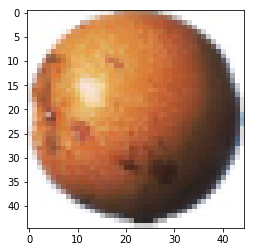

In [148]:
print(X_train[13000].shape)
plt.imshow(X_train[13000])
plt.show()

# Setting Up Our Neural Network


In [149]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, SGD

# Import the backend
from keras import backend as K

# A basic model (2 dense layers (256-128 nodes))

In [154]:
model_dense = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model_dense.add(Dense(256, activation='relu', input_shape=(X_flat_train.shape[1],)))
# Dropout layers remove features and fight overfitting
model_dense.add(Dropout(0.1))
model_dense.add(Dense(128, activation='relu'))
model_dense.add(Dropout(0.1))
# End with a number of units equal to the number of classes we have for our outcome
model_dense.add(Dense(71, activation='softmax'))

model_dense.summary()

# Compile the model to put it all together.
model_dense.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               1555456   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 71)                9159      
Total params: 1,597,511
Trainable params: 1,597,511
Non-trainable params: 0
_________________________________________________________________


In [155]:
model_denseloss='categorical_crossentropy'

history_dense = model_dense.fit(X_flat_train, Y_train,
                          batch_size=128,
                          epochs=10,
                          verbose=1,
                          validation_data=(X_flat_test, Y_test))
score = model_dense.evaluate(X_flat_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 35625 samples, validate on 35625 samples
Epoch 1/10
35625/35625 [==============================] - 604s 17ms/step - loss: 2.9655 - acc: 0.2404 - val_loss: 1.3148 - val_acc: 0.6233
Epoch 2/10
35625/35625 [==============================] - 29s 822us/step - loss: 1.3641 - acc: 0.5610 - val_loss: 0.6677 - val_acc: 0.7901
Epoch 3/10
35625/35625 [==============================] - 28s 784us/step - loss: 0.9483 - acc: 0.6878 - val_loss: 0.4354 - val_acc: 0.8712
Epoch 4/10
35625/35625 [==============================] - 28s 798us/step - loss: 0.7381 - acc: 0.7543 - val_loss: 0.4527 - val_acc: 0.8431
Epoch 5/10
35625/35625 [==============================] - 29s 810us/step - loss: 0.6032 - acc: 0.8020 - val_loss: 0.4014 - val_acc: 0.8644
Epoch 6/10
35625/35625 [==============================] - 28s 778us/step - loss: 0.5184 - acc: 0.8285 - val_loss: 0.2030 - val_acc: 0.9407
Epoch 7/10
35625/35625 [==============================] - 28s 780us/step - loss: 0.4498 - acc: 0.8505 - val_loss: 0.

### Test accuracy: 0.9834947368421053 on the test set using a neural network with two dense layers (256 nodes and 128 nodes) and dropout = 0.1(to reduce overfitting)

## A deeper network (5 dense layers (256-128-128-128-128 nodes))

In [156]:
model_deep = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model_deep.add(Dense(256, activation='relu', input_shape=(X_flat_train.shape[1],)))
# Dropout layers remove features and fight overfitting
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
model_deep.add(Dense(128, activation='relu'))
model_deep.add(Dropout(0.05))
# End with a number of units equal to the number of classes we have for our outcome
model_deep.add(Dense(71, activation='softmax'))

model_deep.summary()

# Compile the model to put it all together.
model_deep.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_deep = model_deep.fit(X_flat_train, Y_train,
                          batch_size=128,
                          epochs=10,
                          verbose=1,
                          validation_data=(X_flat_test, Y_test))
score = model_deep.evaluate(X_flat_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               1555456   
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
__________

# CNN model

In [ ]:
model_cnn = Sequential()
# First convolutional layer, note the specification of shape
model_cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(45, 45, 3)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(71, activation='softmax'))

model_cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_cnn.fit(X_train, Y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model_cnn.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 35625 samples, validate on 35625 samples
Epoch 1/1
 6272/35625 [====>.........................] - ETA: 6:26 - loss: 3.9543 - acc: 0.0719

In [ ]:
model_cnn.fit(X_train, Y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))
score = model_cnn.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])